In [1]:
install.packages("FactoMineR")
install.packages("factoextra")
install.packages("vcdExtra")
install.packages('factoextra')
install.packages('plotrix')
install.packages('cluster')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘car’, ‘DT’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggrepel’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘corrplot’, ‘viridis’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘dendextend’, ‘ggpubr’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘lmtest’, ‘qvcalc’, ‘relimp’, ‘vcd’, ‘gnm’, ‘ca’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/

In [2]:
library(readxl)
library(corrplot)
library(FactoMineR)
library(factoextra)
library(plotrix)
library(cluster)

corrplot 0.90 loaded

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



Este dataset se extrajo de:

https://ubicomp.eti.uni-siegen.de/home/datasets/icmi18/

Cuyo proposito es la identificación de episodios de estres en 20 sujetos sometidos a una preuba de aproximadamente 1 hora y 40 minutos donde se registraron el pulso y la frencuencia respiratoria.
Despues de un analisis posterior se aagrego al dataset  la variabilidad cardiaca y  los  tiempos entre ondas R_R

In [3]:
data = data.frame(read_xlsx('/content/sample_data/estres.xlsx')); print(head(data))

     PULSO TIEMPOS.ONDA.R.R VARIABILIDAD.CARDIACA RESPIRACIONES PERSONA ESTRÉS
1 78.33385        0.7659524            0.13317280             7       1      0
2 78.42752        0.7650376            0.14026163             7       1      0
3 82.80585        0.7245865            0.12240835             8       1      0
4 78.96299        0.7598496            0.05295764             3       1      0
5 77.14286        0.7777778            0.04923965             6       1      0
6 76.52474        0.7840602            0.05691873             6       1      0


In [7]:
datos= data[1:7265,1:6]
datos

,PULSO,TIEMPOS.ONDA.R.R,VARIABILIDAD.CARDIACA,RESPIRACIONES,PERSONA,ESTRÉS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,78.33385,0.7659524,0.13317280,7,1,0
2,78.42752,0.7650376,0.14026163,7,1,0
3,82.80585,0.7245865,0.12240835,8,1,0
4,78.96299,0.7598496,0.05295764,3,1,0
5,77.14286,0.7777778,0.04923965,6,1,0
6,76.52474,0.7840602,0.05691873,6,1,0
7,83.37687,0.7196241,0.05013551,6,1,0
8,82.07934,0.7310000,0.03134678,6,1,0
9,74.65192,0.8037302,0.06086834,4,1,0


In [8]:
print(cor(datos))

                             PULSO TIEMPOS.ONDA.R.R VARIABILIDAD.CARDIACA
PULSO                  1.000000000     -0.980187454            0.23390069
TIEMPOS.ONDA.R.R      -0.980187454      1.000000000           -0.18605744
VARIABILIDAD.CARDIACA  0.233900686     -0.186057444            1.00000000
RESPIRACIONES         -0.009595205      0.009661585           -0.04227291
PERSONA               -0.073272626      0.097210634            0.14334788
ESTRÉS                 0.178327403     -0.145618665            0.73207713
                      RESPIRACIONES     PERSONA      ESTRÉS
PULSO                  -0.009595205 -0.07327263  0.17832740
TIEMPOS.ONDA.R.R        0.009661585  0.09721063 -0.14561867
VARIABILIDAD.CARDIACA  -0.042272906  0.14334788  0.73207713
RESPIRACIONES           1.000000000  0.18357826 -0.01467296
PERSONA                 0.183578265  1.00000000  0.14682406
ESTRÉS                 -0.014672956  0.14682406  1.00000000


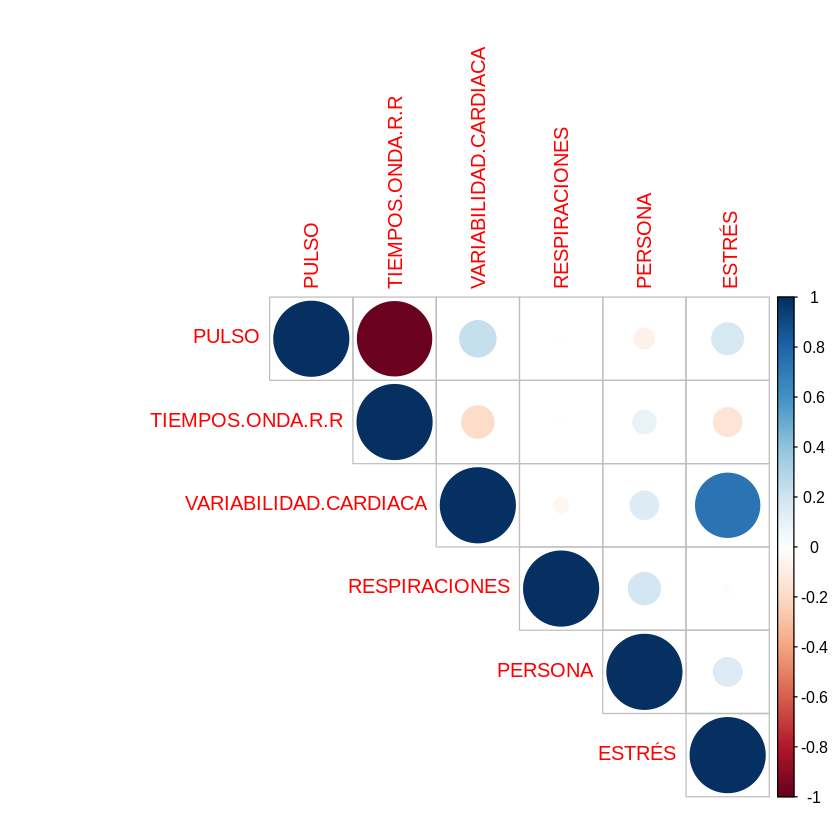

In [9]:
corrplot(cor(datos), type="upper")


In [10]:
datos_est = scale(datos) ## Normalización de los datos
datos_est

,PULSO,TIEMPOS.ONDA.R.R,VARIABILIDAD.CARDIACA,RESPIRACIONES,PERSONA,ESTRÉS
1,0.747454704,-0.86290792,0.86727610,1.6134318,-1.578199,-0.2368651
2,0.759174545,-0.87382532,0.98567068,1.6134318,-1.578199,-0.2368651
3,1.307002171,-1.35658377,0.68749317,2.3508237,-1.578199,-0.2368651
4,0.826174315,-0.93574044,-0.47244154,-1.3361359,-1.578199,-0.2368651
5,0.598434652,-0.72177934,-0.53453768,0.8760399,-1.578199,-0.2368651
6,0.521094492,-0.64680322,-0.40628508,0.8760399,-1.578199,-0.2368651
7,1.378448956,-1.41580693,-0.51957539,0.8760399,-1.578199,-0.2368651
8,1.216099617,-1.28004233,-0.83337632,0.8760399,-1.578199,-0.2368651
9,0.286762714,-0.41205419,-0.34032045,-0.5987440,-1.578199,-0.2368651
10,-0.055335969,-0.04739309,0.03643255,1.6134318,-1.578199,-0.2368651


In [11]:
P = cor(datos_est);
P

,PULSO,TIEMPOS.ONDA.R.R,VARIABILIDAD.CARDIACA,RESPIRACIONES,PERSONA,ESTRÉS
PULSO,1.000000000,-0.980187454,0.23390069,-0.009595205,-0.07327263,0.17832740
TIEMPOS.ONDA.R.R,-0.980187454,1.000000000,-0.18605744,0.009661585,0.09721063,-0.14561867
VARIABILIDAD.CARDIACA,0.233900686,-0.186057444,1.00000000,-0.042272906,0.14334788,0.73207713
RESPIRACIONES,-0.009595205,0.009661585,-0.04227291,1.000000000,0.18357826,-0.01467296
PERSONA,-0.073272626,0.097210634,0.14334788,0.183578265,1.00000000,0.14682406
ESTRÉS,0.178327403,-0.145618665,0.73207713,-0.014672956,0.14682406,1.00000000


In [12]:
EIG = eigen(P)
VP = EIG$values; print(VP)

[1] 2.2504813 1.5695647 1.1322336 0.7631370 0.2661380 0.0184453


In [13]:
e = EIG$vectors; print(e)

            [,1]       [,2]       [,3]        [,4]          [,5]          [,6]
[1,]  0.57880531  0.3633147 -0.1389291 -0.10066508 -0.0005006938  0.7096138956
[2,] -0.56352744 -0.3963581  0.1404118  0.09432988 -0.0438656684  0.7034197249
[3,]  0.43004021 -0.5018213  0.1824345  0.14319747 -0.7127307407 -0.0383122994
[4,] -0.02585092 -0.0934183 -0.7881367  0.60709733 -0.0296233893  0.0007136986
[5,]  0.01497799 -0.4081215 -0.5267064 -0.74531252  0.0124768020 -0.0121028613
[6,]  0.40198762 -0.5327176  0.1706509  0.19080089  0.6993262672  0.0058299960


In [14]:
PROP_VAR = 100 * VP / sum(VP); print(round(PROP_VAR, 2))

[1] 37.51 26.16 18.87 12.72  4.44  0.31


In [15]:
corr_1 = e[,1]*sqrt(VP[1])
corr_2 = e[,2]*sqrt(VP[2])
corr_3 = e[,3]*sqrt(VP[3])
print(cbind(corr_1, corr_2, corr_3))

          corr_1     corr_2     corr_3
[1,]  0.86830081  0.4551689 -0.1478295
[2,] -0.84538157 -0.4965664  0.1494072
[3,]  0.64512930 -0.6286931  0.1941221
[4,] -0.03878052 -0.1170366 -0.8386285
[5,]  0.02246939 -0.5113038 -0.5604497
[6,]  0.60304592 -0.6674007  0.1815836


In [16]:
contrib_1 = (e[,1]*sqrt(VP[1]))^2 / sum((e[,1]*sqrt(VP[1]))^2) * 100
contrib_2 = (e[,2]*sqrt(VP[2]))^2 / sum((e[,2]*sqrt(VP[2]))^2) * 100
contrib_3 = (e[,3]*sqrt(VP[3]))^2 / sum((e[,3]*sqrt(VP[3]))^2) * 100

print(cbind(contrib_1, contrib_2, contrib_3))

       contrib_1  contrib_2 contrib_3
[1,] 33.50155826 13.1997541  1.930129
[2,] 31.75631789 15.7099717  1.971547
[3,] 18.49345804 25.1824625  3.328234
[4,]  0.06682698  0.8726979 62.115953
[5,]  0.02243402 16.6563126 27.741963
[6,] 16.15940481 28.3788011  2.912174


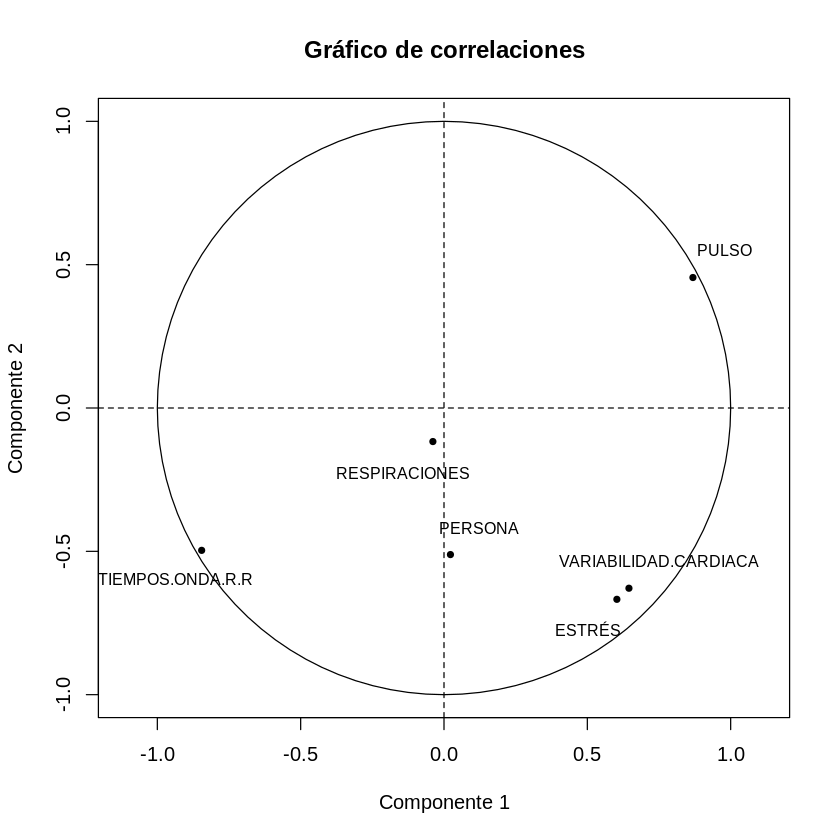

In [17]:
plot(corr_1, corr_2, pch = 20, asp = 1, xlim = c(-1,1), ylim = c(-1,1), main = 'Gráfico de correlaciones', xlab = 'Componente 1', ylab = 'Componente 2')
draw.circle(0,0,1)
abline(h = 0, v = 0, lty = 2)
text(jitter(cbind(corr_1, corr_2)+c(.1,-.1)), colnames(P), cex = 0.8)

La grafica indica que las variables en el tercer cuadrante (PERSONA,VARIABILIDAD CARDICA, ESTRES) tienen una similitud mayor,en otras que palabras que comparte un valor o una relación muy cercana

#Utilizando la libreria PCA

In [18]:
datos = data[, -c(1)]
rownames(datos) = unclass(data$Departamentos); print(head(datos))

  TIEMPOS.ONDA.R.R VARIABILIDAD.CARDIACA RESPIRACIONES PERSONA ESTRÉS
1        0.7659524            0.13317280             7       1      0
2        0.7650376            0.14026163             7       1      0
3        0.7245865            0.12240835             8       1      0
4        0.7598496            0.05295764             3       1      0
5        0.7777778            0.04923965             6       1      0
6        0.7840602            0.05691873             6       1      0


In [20]:
res.pca = FactoMineR::PCA(datos, scale.unit = TRUE, graph = F)

In [21]:
print(res.pca$eig)

       eigenvalue percentage of variance cumulative percentage of variance
comp 1  1.8362654              36.725309                          36.72531
comp 2  1.2108968              24.217937                          60.94325
comp 3  0.9590514              19.181027                          80.12427
comp 4  0.7276485              14.552970                          94.67724
comp 5  0.2661379               5.322758                         100.00000


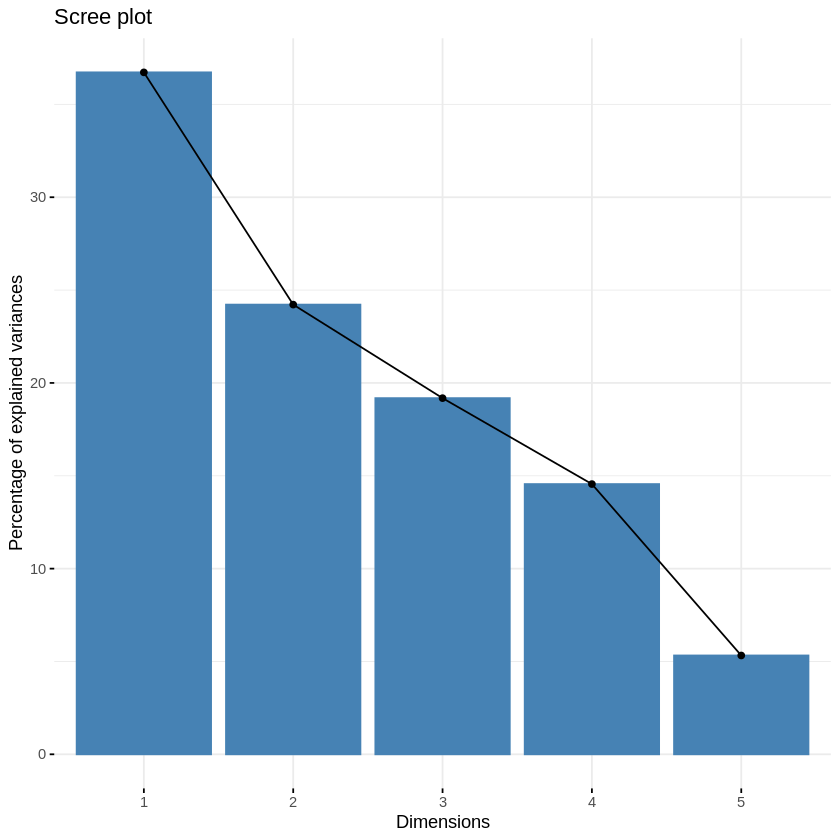

In [22]:
factoextra::fviz_screeplot(res.pca, ncp = 10)

In [23]:
print(res.pca$var$coord)

                             Dim.1       Dim.2      Dim.3      Dim.4
TIEMPOS.ONDA.R.R      -0.328636378  0.43160909  0.7442930  0.3889001
VARIABILIDAD.CARDIACA  0.912831414 -0.05387226  0.1032482  0.1340832
RESPIRACIONES         -0.005230604  0.68131231 -0.6021681  0.4158681
PERSONA                0.275992575  0.74656629  0.1287850 -0.5914729
ESTRÉS                 0.904877400 -0.01266950  0.1233981  0.1887866
                             Dim.5
TIEMPOS.ONDA.R.R       0.022279533
VARIABILIDAD.CARDIACA  0.367692921
RESPIRACIONES          0.015277443
PERSONA               -0.006412464
ESTRÉS                -0.360789297


In [24]:
print(res.pca$var$contrib)

                             Dim.1       Dim.2     Dim.3     Dim.4       Dim.5
TIEMPOS.ONDA.R.R       5.881604440 15.38416826 57.762499 20.785217  0.18651142
VARIABILIDAD.CARDIACA 45.378036131  0.23967526  1.111535  2.470742 50.80001191
RESPIRACIONES          0.001489938 38.33410531 37.808868 23.767837  0.08769900
PERSONA                4.148196683 46.02879519  1.729374 48.078184  0.01545052
ESTRÉS                44.590672809  0.01325597  1.587724  4.898020 48.91032715


In [26]:
#print(res.pca$ind$coord)

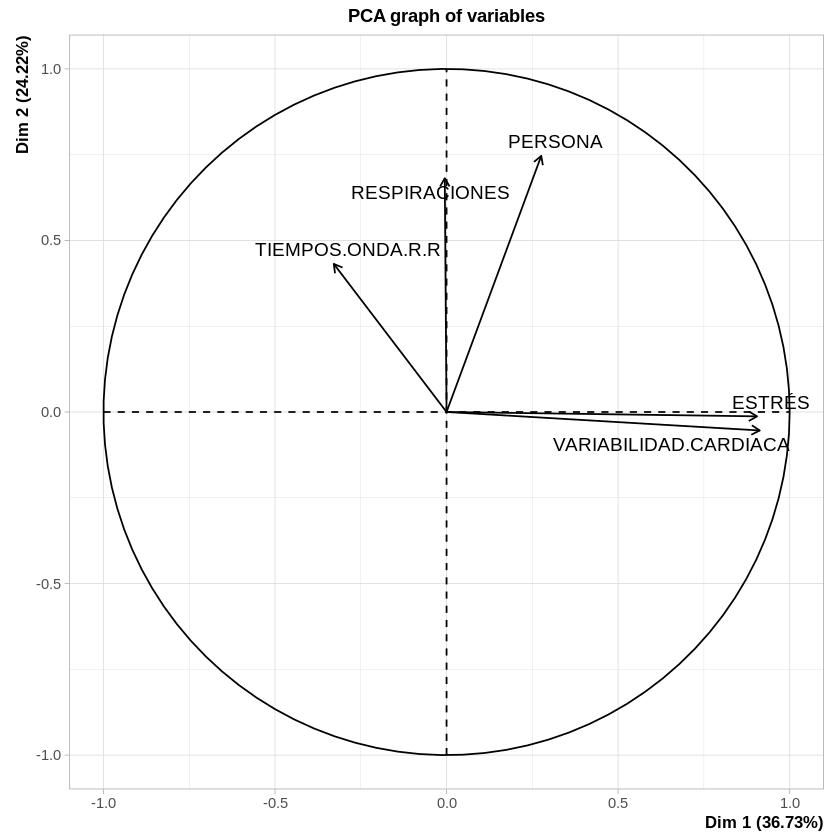

In [27]:
FactoMineR::plot.PCA(res.pca, axes = c(1,2), choix = "var")


La grafica indica la clasificación por cuadrantes de los diferentes registros,esto permite estimar un modelo que es capaz de establecer una separación con base a la correlación de las pruebas para detección de estres en 20 sujetos

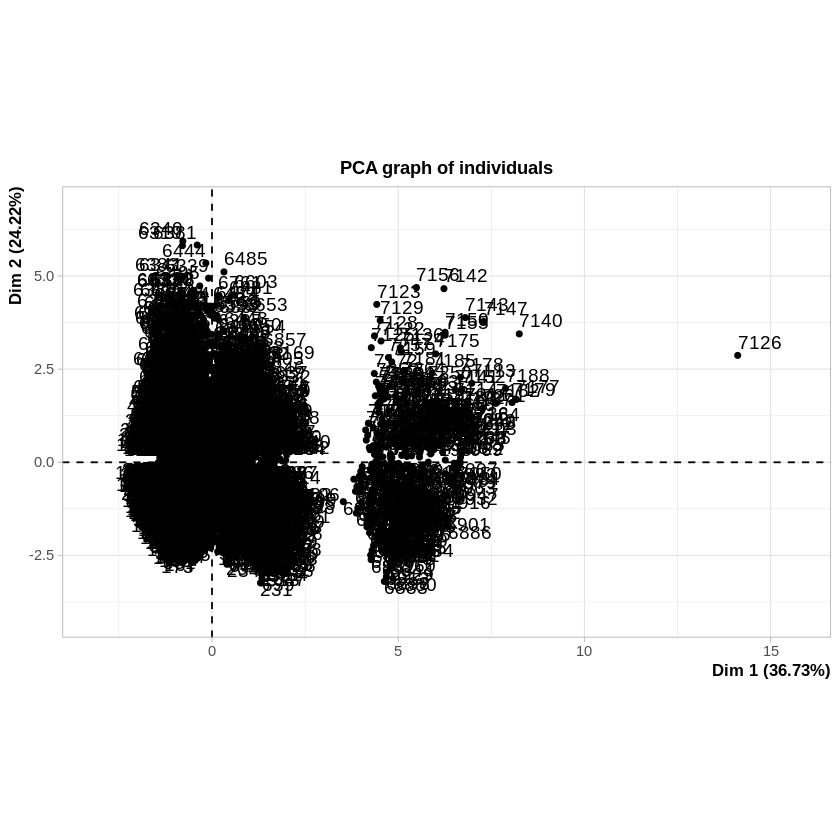

In [28]:
FactoMineR::plot.PCA(res.pca, axes = c(1,2), choix = "ind")

A grandes rasgos se puede ver que los registros se agrupan en 3 grupos indicando los 5 parametros que componen cada uno presentan ciertas similitudes

Warning message:
“ggrepel: 7244 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


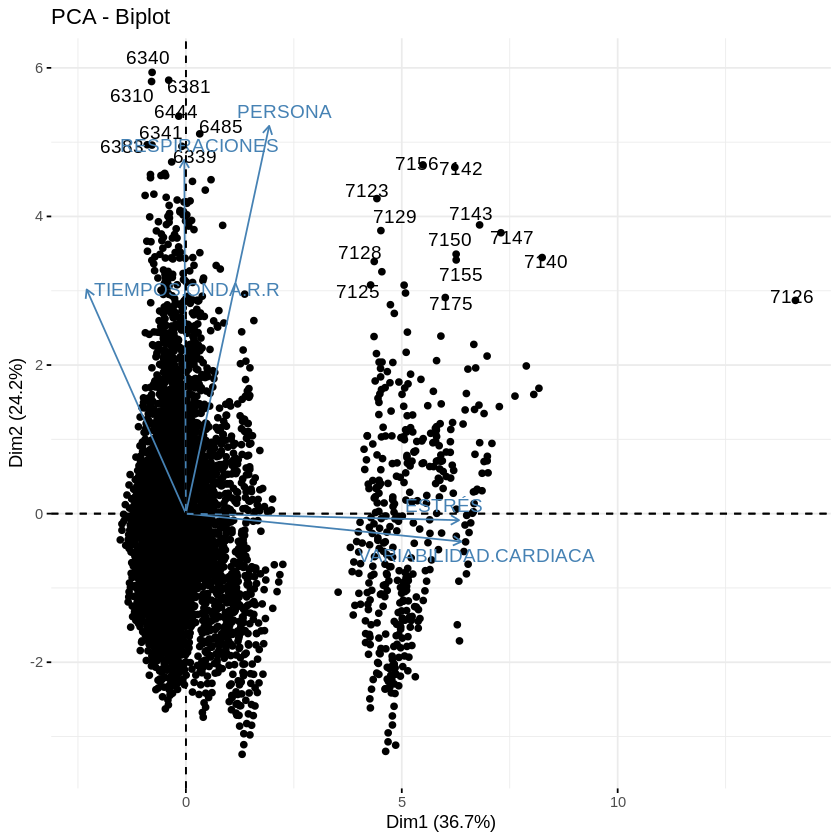

In [29]:
factoextra::fviz_pca_biplot(res.pca, axes = c(1, 2), repel = TRUE)

En el grafico se observa la clasificación en 3 grupos de los 7265 registros, esta clasificacion indica que las similitudes que tienen algunos de ellos (puede tener igual frecuencia,variabilidad muy parecida o ser episodios de estres)

#AGRUPACIÓN DE CONGLOMERADOS - CLUSTERS

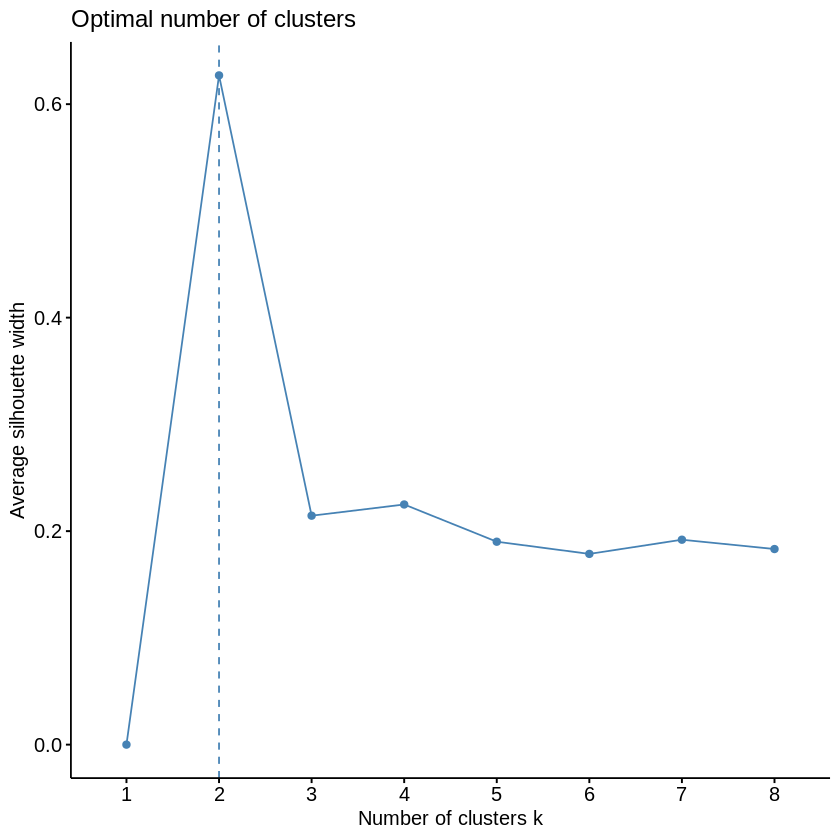

In [30]:
factoextra::fviz_nbclust(scale(datos), hcut, method = "silhouette",k.max=8) ## method = c('silhouette', 'wss', 'gap_stat')

El grafico identifica la eficiecia del cluster o  en otras palabras que tan separables o clasificables son los datos

In [31]:
set.seed(123)
km.res <- kmeans(scale(datos), 3, iter.max = 10000)
#?kmeans

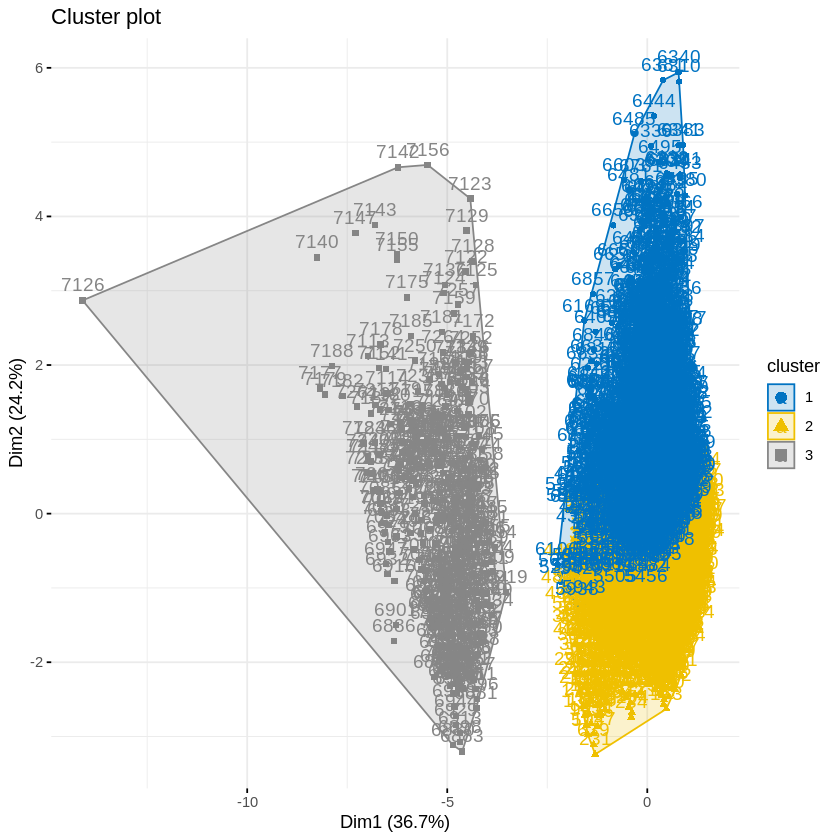

In [32]:

fviz_cluster(km.res, data = datos, 
             ellipse.type = "convex", # c("t", "norm", "euclid") o "convex" o "confidence"
             palette = "jco",
             ggtheme = theme_minimal())

En el grafico se observa la clasificación en 3 grupos de los 7265 registros, esta clasificacion indica  que las similitudes que tienen algunos de ellos (puede tener igual frecuencia,variabilidad muy parecida o ser episodios de estres)
